# CIFAR10 Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset:
airplane 										
automobile 										
bird 										
cat 										
deer 										
dog 										
frog 										
horse 										
ship 										
truck 										

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks. 

## Importing the required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Helper Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

print(keras.__version__)

2.3.0
2.4.0


In [4]:
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [5]:
from keras.datasets import cifar10

## Load and Explore the Data

In [6]:
# the data is shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [7]:
# Observe that Input data contains 50000 data points
# Each data point is a image of 32*32 pixel
# Each image have 3 channels


print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


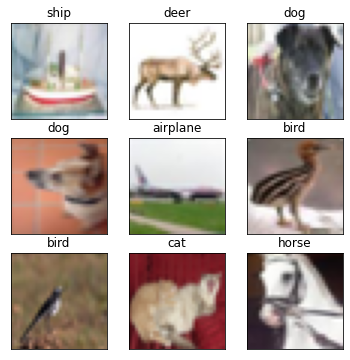

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(6, 6))
np.random.seed(0)
idx = np.random.randint(0, 50000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1, xticks=[], yticks=[])
    index = y_train[idx[i]]
    plt.title(class_names[index[0]])
    plt.imshow(X_train[idx[i]])


## Question - 1: Data Preprocessing

Perform the required preprocessing of the data, like:



1. Normalization

In [9]:

X_train = X_train/255 
X_test = X_test/255

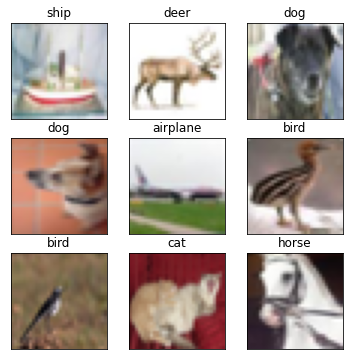

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(6, 6))
np.random.seed(0)
idx = np.random.randint(0, 50000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1, xticks=[], yticks=[])
    index = y_train[idx[i]]
    plt.title(class_names[index[0]])
    plt.imshow(X_train[idx[i]])


2. One hot encoding on target variable

In [11]:
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Question - 2: Neural Network - 1

Build a neural network with following configuration:
1. Hidden Layer 1 -> FC - 512
2. Hidden Layer 2 -> FC - 128
3. Output Layer -> FC - 10

Experiment with Dropouts and BatchNormalisation in between the network.

Use batchsize = 32 and epochs = 50


In [ ]:
print(X_train.shape,X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# define model 
model = None
model = Sequential()

# adding flatten layer
model.add(Flatten(input_shape = (32,32,3)))

#FC - 512
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.22))

#FC - 128
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
# model.add(BatchNormalization())
model.add(Dropout(0.2))

#FC- 10
model.add(Dense(10, activation='softmax'))

#compile_model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

#fitting model
model.fit(X_train,y_train,batch_size=32,epochs=50)


Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8363 - accuracy: 0.3546
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6868 - accuracy: 0.4007
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6557 - accuracy: 0.4125
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6302 - accuracy: 0.4237
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6128 - accuracy: 0.4258
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5970 - accuracy: 0.4342
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5888 - accuracy: 0.4344
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5781 - accuracy: 0.4415
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5808 - accuracy: 0.4398
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.575

In [ ]:
predict_score = model.evaluate(X_test,y_test,verbose=0)
print('Loss: ',predict_score[0],'\nAccuracy: ',predict_score[1])

Loss:  1.4661237001419067 
Accuracy:  0.48669999837875366


## Question - 3: Neural Network - 2

Build a neural network with following configuration:
1. Conv3-32
2. Conv3-64
3. MaxPooling with pool size (2, 2)
4. FC-512
5. FC-128
6. FC-10

Donot use padding in convolutional layers.
Experiment with Dropouts and BatchNormalisation in between the network.

Use batchsize = 32 and epochs = 50


In [ ]:
print(X_train.shape,X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [55]:
# define model 
model = None
model = Sequential()

#Conv3-32
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', kernel_initializer='he_normal'))

#Conv3-64
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))

#Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.65))

# flatten layer
model.add(Flatten())

#FC - 512
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.6))

#FC - 128
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.43))

#FC- 10
model.add(Dense(10, activation='softmax'))

#compile_model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

#fitting model
model.fit(X_train,y_train,batch_size=32,epochs=50)


Epoch 1/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.7902 - accuracy: 0.3686
Epoch 2/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3325 - accuracy: 0.5220
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1939 - accuracy: 0.5794
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1120 - accuracy: 0.6091
Epoch 5/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0667 - accuracy: 0.6274
Epoch 6/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0261 - accuracy: 0.6419
Epoch 7/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9848 - accuracy: 0.6563
Epoch 8/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9498 - accuracy: 0.6717
Epoch 9/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9285 - accuracy: 0.6760
Epoch 10/50
1563/1563 [==============================] - 17s 11m

In [56]:
predict_score = model.evaluate(X_test,y_test,verbose=0)
print('Loss: ',predict_score[0],'\nAccuracy: ',predict_score[1])

Loss:  0.6859538555145264 
Accuracy:  0.7642999887466431


## Question - 4: Neural Network - 3

Build a neural network with following configuration:

1. Conv3-32 with zero padding
2. Conv3-32
3. MaxPooling with pool size (2, 2)
4. Dropout with 25% drop out rate
5. Conv3-64 with zero padding
6. Conv3-64
7. MaxPooling with pool size (2, 2)
8. Dropout with 25% drop out rate
9. FC-512
10. Dropout with 25% drop out rate
11. FC-10

Use batchsize = 32 and epochs = 50

In [61]:
# define model 
model = None
model = Sequential()

#Conv3-32
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',input_shape=(32, 32, 3), activation='relu', kernel_initializer='he_normal'))

#Conv3-32
model.add(Conv2D(32,(3, 3), activation='relu', kernel_initializer='he_normal'))

#Maxpooling with 25% dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Conv3-64
model.add(Conv2D(64, (3, 3), padding='same',activation='relu', kernel_initializer='he_normal')) 

#Conv3-64
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))

#Maxpooling with 25% dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten layer
model.add(Flatten())

#FC - 512
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.25))

#FC- 10
model.add(Dense(10, activation='softmax'))

#compile_model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

#fitting model
model.fit(X_train,y_train,batch_size=32,epochs=50)


Epoch 1/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4712 - accuracy: 0.4652
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0528 - accuracy: 0.6308
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8772 - accuracy: 0.6894
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7710 - accuracy: 0.7322
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6943 - accuracy: 0.7582
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6288 - accuracy: 0.7796
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5815 - accuracy: 0.7967
Epoch 8/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5433 - accuracy: 0.8081
Epoch 9/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.5016 - accuracy: 0.8234
Epoch 10/50
1563/1563 [==============================] - 13s 8ms/step - l

In [62]:
predict_score = model.evaluate(X_test,y_test,verbose=0)
print('Loss: ',predict_score[0],'\nAccuracy: ',predict_score[1])

Loss:  0.8409517407417297 
Accuracy:  0.7864999771118164
